# Total Factor of Productivity (TFP)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv('../data/TFPData_updated.csv')

In [4]:
comp = pd.read_csv('../data/CompFunda.csv')

/Users/shinggg/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8,10,12,26,30,945,946,948,949,950,955,965,969,970,975,976) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
dt.shape

(143912, 3)

In [6]:
dt.fyear.max()

2016

In [7]:
comp.shape

(429025, 981)

In [8]:
comp.fyear.min()

1963

In [9]:
dt.head()

,gvkey,fyear,TFP
0,1000,1970,-0.103652
1,1000,1971,-0.451370
2,1000,1972,-0.279306
3,1000,1973,-0.247248
4,1000,1974,-0.298531


In [10]:
dt.TFP.describe()

count    143912.000000
mean         -0.325610
std           0.449125
min          -5.487288
25%          -0.513174
50%          -0.306304
75%          -0.109718
max           3.402086
Name: TFP, dtype: float64

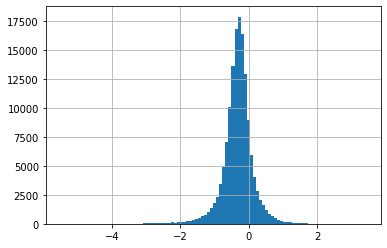

In [11]:
dt.TFP.hist(bins=100)

In [12]:
dt_TFP_frontier_yearly = dt.groupby('fyear')[['TFP']].max()
dt_TFP_mean_yearly = dt.groupby('fyear')[['TFP']].mean()
dt_TFP_median_yearly = dt.groupby('fyear')[['TFP']].median()

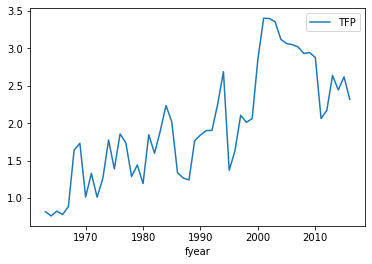

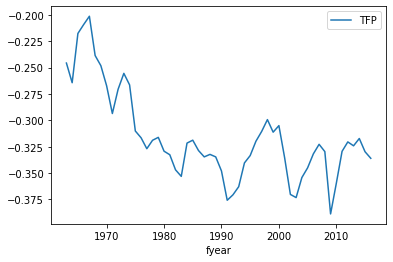

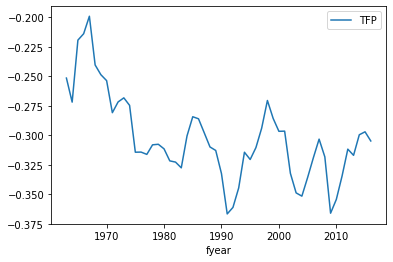

In [13]:
dt_TFP_frontier_yearly.plot()
dt_TFP_mean_yearly.plot()
dt_TFP_median_yearly.plot()

In [14]:
# create preferrerd stock
comp['ps']=np.where(comp['pstkrv'].isnull(), comp['pstkl'], comp['pstkrv'])
comp['ps']=np.where(comp['ps'].isnull(),comp['pstk'], comp['ps'])
comp['ps']=np.where(comp['ps'].isnull(),0,comp['ps'])

comp['txditc']=comp['txditc'].fillna(0)

# create book equity
comp['be']=comp['seq']+comp['txditc']-comp['ps']
comp['be']=np.where(comp['be']>0, comp['be'], np.nan)

In [15]:
# create market value
comp['me']=comp['prcc_f']*comp['csho']

In [16]:
# compare me and mkvalt
comp[comp.tic=='MMM'][['fyear','mkvalt','me','sic']]

,fyear,mkvalt,me,sic
114088,1964,NaN,2953.093375,2670
114089,1965,NaN,3631.676000,2670
114090,1966,NaN,4175.730000,2670
114091,1967,NaN,5079.847500,2670
114092,1968,NaN,5678.041260,2670
114093,1969,NaN,6145.358250,2670
114094,1970,NaN,5553.801000,2670
114095,1971,NaN,7597.935000,2670
114096,1972,NaN,9679.991875,2670
114097,1973,NaN,8821.800000,2670


In [17]:
comp['gvkey']=comp.gvkey.astype('int')

# Control
## Age
AGE is the number of years since the firm first shows up in Compustat.

In [18]:
comp['age']=comp.fyear - comp.groupby('gvkey').fyear.transform(min)

# Merge

In [19]:
df_merged=pd.merge(dt,comp, on=['gvkey','fyear'])

In [20]:
df = df_merged.copy()

In [21]:
df.shape

(143391, 986)

In [22]:
df=df[df['sic'].notna()]

In [23]:
df.shape

(143391, 986)

In [24]:
#df= df[~((df.sic >= 4900) & (df.sic < 5000))]
#df= df[~((df.sic >= 6000) & (df.sic < 7000))]

In [25]:
df.shape

(143391, 986)

In [26]:
#df=df[(df.aqc <= (0.05 * df['at']))]

In [27]:
df.shape

(143391, 986)

# Construct Frontier Productivity

In [28]:
# clip TFP
lr = df['TFP'].describe(percentiles=[0.005])['0.5%']
up = df['TFP'].describe(percentiles=[0.995])['99.5%']
df.TFP = df.TFP.clip(lr, up)

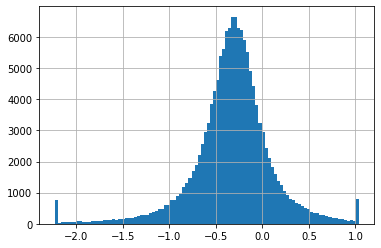

In [29]:
df.TFP.hist(bins=100)

In [30]:
df['sic'] = df.sic.astype('str')

## Construct Froniter using by SIC2

In [31]:
df['sic2'] = df['sic'].str[0:2]

In [32]:
df.loc[df.index,'TFP_frontier_fyear_sic2'] = df.groupby(['fyear', 'sic2'])['TFP'].transform(max)
df.loc[df.index,'TFP_mean_fyear_sic2'] = df.groupby(['fyear', 'sic2'])['TFP'].transform(np.mean)
df.loc[df.index,'TFP_median_fyear_sic2'] = df.groupby(['fyear', 'sic2'])['TFP'].transform(np.median)

df.loc[df.index,'gap'] = df['TFP_frontier_fyear_sic2'] - df['TFP']

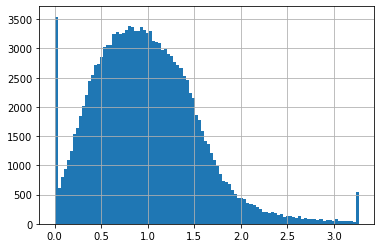

In [33]:
df.gap.hist(bins=100)

In [34]:
# remove gap == 0
df = df[df.gap > 0]

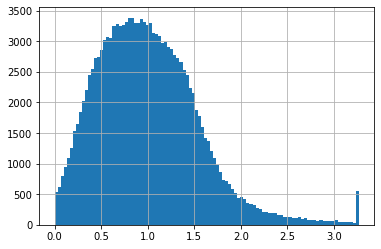

In [35]:
df.gap.hist(bins=100)

# Construct Book to Market

In [36]:
df=df[df['be'].notna()]
df=df[df['me'].notna()]

df=df[df['be']>0]
df=df[df['me']>0]

In [37]:
df.shape

(124269, 991)

In [38]:
df['beme'] = df['be']/df['me']

In [39]:
df['beme'].describe()

count    124269.000000
mean         12.105924
std        1382.438018
min           0.000052
25%           0.382729
50%           0.660058
75%           1.116265
max      308133.891213
Name: beme, dtype: float64

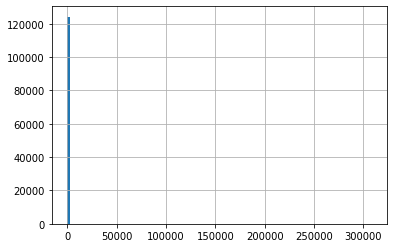

In [40]:
df['beme'].hist(bins=100)

In [41]:
df[['gap', 'beme']].corr()

,gap,beme
gap,1.000000,-0.001953
beme,-0.001953,1.000000


In [42]:
lr = df['beme'].describe(percentiles=[0.005])['0.5%']
up = df['beme'].describe(percentiles=[0.995])['99.5%']
df.beme = df.beme.clip(lr, up)

In [43]:
df.shape

(124269, 992)

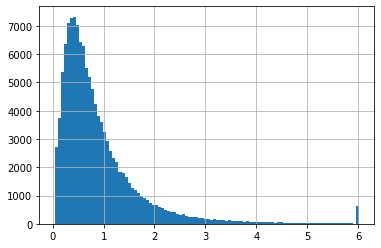

In [44]:
df.beme.hist(bins=100)

In [45]:
# clip gap
# lr = df['gap'].describe(percentiles=[0.005])['0.5%']
# up = df['gap'].describe(percentiles=[0.995])['99.5%']
# df.gap = df.gap.clip(lr, up)

In [46]:
df[['gap', 'beme']].corr()

,gap,beme
gap,1.000000,0.053965
beme,0.053965,1.000000


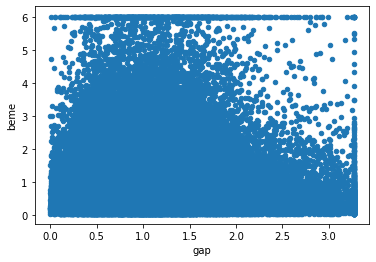

In [47]:
df.plot.scatter(x='gap', y='beme')

# Control Variables

## Size: Natural logarithm of total assets in \$ Million

In [48]:
df['size'] = np.log(df['at'])

## Leverage ratio: the ratio of total debt to the market value of equity

In [49]:
df['lev'] = (df['dltt'] + df['dlc']) / (df['prcc_f'] * df['csho'])

## R&D Intensity
research and development expenditures over sales

In [50]:
df['rdi'] = df['xrd'] / df['sale']

# Advertising Intensity
advertising expenses over sales;

In [51]:
df['adi'] = df['xad'] / df['sale']

# Employee Size

In [52]:
df['emp_size'] = np.log(df['emp'])

/Users/shinggg/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# ROA
The net income in year t divided by total assets for year t.

In [53]:
df['roa'] = df['ni']/df['at']

# ROE
The net income in year t divided by book equity for year t.

In [54]:
df['roe'] = df['ni']/df['be']

# GPR 
The gross profits in year t divided by book assets for year t.

In [55]:
df['gpr'] = df['gp']/df['at']

# Panel Regressions

In [56]:
from linearmodels import PanelOLS

In [57]:
df=df.set_index(['gvkey','fyear'])

In [58]:
mod = PanelOLS.from_formula('beme ~ 1 + gap + size + EntityEffects + TimeEffects', data=df)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

/Users/shinggg/anaconda3/lib/python3.6/site-packages/linearmodels/panel/data.py:98: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_categorical(s):


                          PanelOLS Estimation Summary                           
Dep. Variable:                   beme   R-squared:                        0.0425
Estimator:                   PanelOLS   R-squared (Between):             -0.1977
No. Observations:              124269   R-squared (Within):               0.0017
Date:                Wed, Dec 09 2020   R-squared (Overall):             -0.1346
Time:                        18:48:22   Log-likelihood                -9.748e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2489.8
Entities:                       12116   P-value                           0.0000
Avg Obs:                       10.257   Distribution:                F(2,112098)
Min Obs:                       1.0000                                           
Max Obs:                       54.000   F-statistic (robust):             678.23
                            

In [59]:
mod = PanelOLS.from_formula('beme ~ 1 + gap + size + EntityEffects + TimeEffects', data=df)
res = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   beme   R-squared:                        0.0425
Estimator:                   PanelOLS   R-squared (Between):             -0.1977
No. Observations:              124269   R-squared (Within):               0.0017
Date:                Wed, Dec 09 2020   R-squared (Overall):             -0.1346
Time:                        18:48:29   Log-likelihood                -9.748e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2489.8
Entities:                       12116   P-value                           0.0000
Avg Obs:                       10.257   Distribution:                F(2,112098)
Min Obs:                       1.0000                                           
Max Obs:                       54.000   F-statistic (robust):             222.31
                            

In [60]:
mod = PanelOLS.from_formula('beme ~ 1 + gap + size + emp_size + lev + rdi + adi + roa + roe + gpr + EntityEffects + TimeEffects', data=df)
res = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(res)

/Users/shinggg/anaconda3/lib/python3.6/site-packages/linearmodels/utility.py:549: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


                          PanelOLS Estimation Summary                           
Dep. Variable:                   beme   R-squared:                        0.0680
Estimator:                   PanelOLS   R-squared (Between):             -0.1163
No. Observations:               32532   R-squared (Within):               0.0321
Date:                Wed, Dec 09 2020   R-squared (Overall):             -0.0681
Time:                        18:48:36   Log-likelihood                -2.086e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      225.40
Entities:                        4655   P-value                           0.0000
Avg Obs:                       6.9886   Distribution:                 F(9,27816)
Min Obs:                       1.0000                                           
Max Obs:                       51.000   F-statistic (robust):             24.075
                            

In [61]:
mod = PanelOLS.from_formula('beme ~ 1 + TFP + size + emp_size + lev + rdi + adi + roa + roe + gpr + EntityEffects + TimeEffects', data=df)
res = mod.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                   beme   R-squared:                        0.0727
Estimator:                   PanelOLS   R-squared (Between):             -0.0787
No. Observations:               32532   R-squared (Within):               0.0326
Date:                Wed, Dec 09 2020   R-squared (Overall):             -0.0366
Time:                        18:48:48   Log-likelihood                -2.078e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      242.44
Entities:                        4655   P-value                           0.0000
Avg Obs:                       6.9886   Distribution:                 F(9,27816)
Min Obs:                       1.0000                                           
Max Obs:                       51.000   F-statistic (robust):             24.510
                            

# Sort Portfolios

## Overall sort

In [62]:
dec_dict=df.gap.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).to_dict()
#dec_dict=df.gap.quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).to_dict()

In [63]:
dec_dict

{0.0: 1.3999999999847468e-06,
 0.1: 0.3524705,
 0.2: 0.5271269999999978,
 0.3: 0.67539872,
 0.4: 0.8149337000000003,
 0.5: 0.9532274000000001,
 0.6: 1.0944180200000002,
 0.7: 1.2471682199999967,
 0.8: 1.4138485599999968,
 0.9: 1.6585746799999954,
 1.0: 3.268710949999994}

In [64]:
df.loc[(df.gap >=dec_dict[0.0]) & (df.gap <= dec_dict[0.1]),['gap','TFP','beme']].mean()

gap     0.216873
TFP     0.028106
beme    0.691318
dtype: float64

In [65]:
list(dec_dict.keys())[1::]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [66]:
var_list=['gap','TFP','beme']
overall_sort_dict={}
overall_sort_gap=[]
overall_sort_TFP=[]
overall_sort_beme=[]

for i in range(0,10):
    decile = list(dec_dict.keys())[1::][i]
    if i == 0:
        print('decile = 0.1')
        overall_sort_gap.append(df.loc[(df.gap >=dec_dict[0]) & (df.gap <= dec_dict[decile]),var_list].mean()['gap'])
        overall_sort_TFP.append(df.loc[(df.gap >=dec_dict[0]) & (df.gap <= dec_dict[decile]),var_list].mean()['TFP'])
        overall_sort_beme.append(df.loc[(df.gap >=dec_dict[0]) & (df.gap <= dec_dict[decile]),var_list].mean()['beme'])
    else:
        print(decile)
        decile0 = list(dec_dict.keys())[1::][i-1]
        overall_sort_gap.append(df.loc[(df.gap >dec_dict[decile0]) & (df.gap <= dec_dict[decile]),var_list].mean()['gap'])
        overall_sort_TFP.append(df.loc[(df.gap >dec_dict[decile0]) & (df.gap <= dec_dict[decile]),var_list].mean()['TFP'])
        overall_sort_beme.append(df.loc[(df.gap >dec_dict[decile0]) & (df.gap <= dec_dict[decile]),var_list].mean()['beme'])
        
overall_sort_dict['gap']=overall_sort_gap
overall_sort_dict['TFP']=overall_sort_TFP
overall_sort_dict['beme']=overall_sort_beme

decile = 0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


In [67]:
overall_sort_dict

{'gap': [0.21687279257262362,
  0.44304451071054896,
  0.6023487224752558,
  0.7459769119175991,
  0.883608363708051,
  1.0231454282769987,
  1.1697584952925038,
  1.3285376135269966,
  1.5226920008771143,
  2.0754500888991783],
 'TFP': [0.028106011644000912,
  -0.1099021719642715,
  -0.15342471483060993,
  -0.19984043572060842,
  -0.2303274408545909,
  -0.26947538457830406,
  -0.31829835809930057,
  -0.40661133497223917,
  -0.5603943426732112,
  -1.0987702829363506],
 'beme': [0.6913175305132674,
  0.8753638281528465,
  0.9227480423598248,
  0.9492765111701459,
  0.9319594410369667,
  0.9128313986923442,
  0.8774494735412652,
  0.8751868461230226,
  0.9588665167796353,
  0.9738862520850164]}

In [68]:
overall_sort_df=pd.DataFrame(overall_sort_dict)

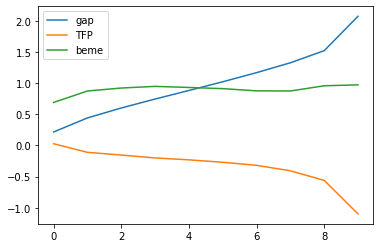

In [69]:
overall_sort_df.plot()

In [70]:
overall_sort_df.loc[9]-overall_sort_df.loc[0]

gap     1.858577
TFP    -1.126876
beme    0.282569
dtype: float64

## Sort within year then average across year

In [71]:
df.reset_index(inplace=True)

In [73]:
dec_year_dict=df[df.fyear==1987].gap.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).to_dict()

In [74]:
dec_year_dict

{0.0: 0.0034797000000000022,
 0.1: 0.34144134000000004,
 0.2: 0.50206474,
 0.3: 0.6677730099999999,
 0.4: 0.8217415199999978,
 0.5: 0.9882929999999971,
 0.6: 1.1316405999999977,
 0.7: 1.2664163899999958,
 0.8: 1.4127625799999999,
 0.9: 1.6190611399999941,
 1.0: 3.268710949999994}

In [75]:
df[df.fyear==1987].loc[(df[df.fyear==1987].gap >dec_year_dict[0.1]) & (df[df.fyear==1987].gap <= dec_year_dict[0.2]), ['gap','TFP','beme']].mean()

gap     0.428375
TFP    -0.160628
beme    0.874461
dtype: float64

In [76]:
list(dec_year_dict.keys())[1::]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [77]:
len(set(df.fyear))

54

In [78]:
var_list=['gap','TFP','beme']
for year in set(df.fyear):
    overall_sort_dict={}
    overall_sort_gap=[]
    overall_sort_TFP=[]
    overall_sort_beme=[]
    dec_year_dict=df[df.fyear==year].gap.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]).to_dict()
    print(year)

    for i in range(0,10):
        decile = list(dec_year_dict.keys())[1::][i]
        if i == 0:
            #print('decile = 0.1')
            overall_sort_gap.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >=dec_year_dict[0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['gap'])
            overall_sort_TFP.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >=dec_year_dict[0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['TFP'])
            overall_sort_beme.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >=dec_year_dict[0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['beme'])
        else:
            #print(decile)
            decile0 = list(dec_year_dict.keys())[1::][i-1]
            overall_sort_gap.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >dec_year_dict[decile0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['gap'])
            overall_sort_TFP.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >dec_year_dict[decile0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['TFP'])
            overall_sort_beme.append(df[df.fyear==year].loc[(df[df.fyear==year].gap >dec_year_dict[decile0]) & (df[df.fyear==year].gap <= dec_year_dict[decile]), var_list].mean()['beme'])

    overall_sort_dict['gap']=overall_sort_gap
    overall_sort_dict['TFP']=overall_sort_TFP
    overall_sort_dict['beme']=overall_sort_beme

    if year==1987:
        overall_sort_df=pd.DataFrame(overall_sort_dict)
    else:
        overall_sort_df+=pd.DataFrame(overall_sort_dict)

overall_sort_df=overall_sort_df/len(set(df.fyear))

1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


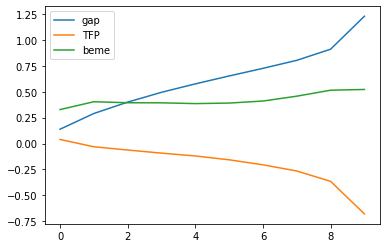

In [79]:
overall_sort_df.plot()

In [80]:
overall_sort_df

,gap,TFP,beme
0,0.137948,0.038969,0.327283
1,0.289509,-0.031438,0.403069
2,0.399433,-0.062891,0.393277
3,0.494008,-0.092798,0.392425
4,0.575298,-0.120193,0.385042
5,0.651582,-0.157140,0.390174
6,0.725090,-0.205535,0.409746
7,0.802406,-0.265158,0.456557
8,0.909887,-0.364883,0.514141
9,1.227762,-0.679241,0.521404


In [81]:
overall_sort_df.corr()

,gap,TFP,beme
gap,1.000000,-0.962348,0.894149
TFP,-0.962348,1.000000,-0.905369
beme,0.894149,-0.905369,1.000000


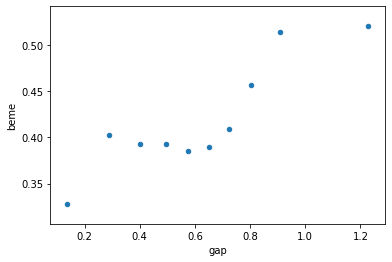

In [82]:
overall_sort_df.plot.scatter(y='beme',x='gap')

In [83]:
var_list_keep = ['gvkey', 'fyear', 'sic', 'sic2', 'beme', 'TFP', 'gap', 'size', 'emp_size', 'lev', 'rdi', 'adi', 'roa', 'roe', 'gpr', 'age']

In [84]:
df2 = df[var_list_keep]

In [85]:
df2.to_csv('../data/TFP_Compustat_sic2_keep.csv', index=False)